<a href="https://colab.research.google.com/github/bondpy202212/AI_projects/blob/main/1_0___NLP_Models_with_GRU_LSTM_Conv1D_IMDB_Reviews_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Download and Prepare the Dataset**\
https://ai.stanford.edu/~amaas/data/sentiment/ \
Large Movie Review Dataset. \
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.

In [ ]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [ ]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

**Tokenizer class and pad_sequences() method**

In [ ]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

**Plot Utility**

In [ ]:
# Plot Utility
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.grid(True)
  plt.title(title)
  plt.show()

**Model 1: Flatten**

In [ ]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │          11,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,533 (670.05 KB)

 Trainable params: 171,533 (670.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(padded,
                                    training_labels_final,
                                    batch_size=BATCH_SIZE,
                                    epochs=NUM_EPOCHS,
                                    validation_data=(testing_padded, testing_labels_final))


Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5821 - loss: 0.6647 - val_accuracy: 0.8254 - val_loss: 0.3938
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8678 - loss: 0.3237 - val_accuracy: 0.8543 - val_loss: 0.3340
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9342 - loss: 0.1993 - val_accuracy: 0.8448 - val_loss: 0.3565
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9761 - loss: 0.1086 - val_accuracy: 0.8387 - val_loss: 0.3913
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9942 - loss: 0.0498 - val_accuracy: 0.8348 - val_loss: 0.4357
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9979 - loss: 0.0227 - val_accuracy: 0.8317 - val_loss: 0.4797
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9996 - loss: 0.0119 - val_accuracy: 0.8300 - val_loss: 0.5126
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accura

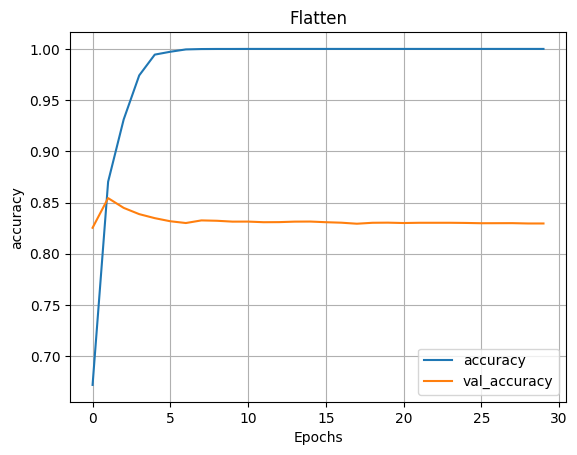

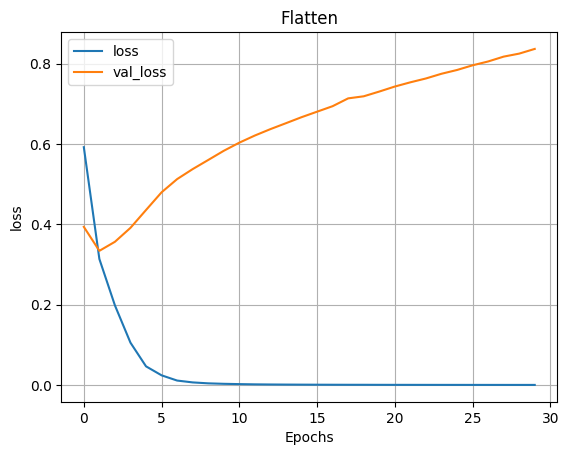

In [ ]:
# Plot the accuracy and loss history
title = 'Flatten'
plot_graphs(history_flatten, 'accuracy', title)
plot_graphs(history_flatten, 'loss', title)

**Model 2: LSTM(long-short-term-memory)**

In [ ]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,941 (675.55 KB)

 Trainable params: 172,941 (675.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BAtCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded,
                              training_labels_final,
                              batch_size=BAtCH_SIZE,
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 190ms/step - accuracy: 0.5276 - loss: 0.6850 - val_accuracy: 0.7376 - val_loss: 0.5805
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.7164 - loss: 0.5833 - val_accuracy: 0.7454 - val_loss: 0.5410
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.7867 - loss: 0.4919 - val_accuracy: 0.8053 - val_loss: 0.4550
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - accuracy: 0.8646 - loss: 0.3489 - val_accuracy: 0.8230 - val_loss: 0.4456
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.8987 - loss: 0.2803 - val_accuracy: 0.8424 - val_loss: 0.3800
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.9055 - loss: 0.2851 - val_accuracy: 0.8367 - val_loss: 0.4093
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9176 - loss: 0.2409 - val_accuracy: 0.8344 - val_loss: 0.4317
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 169ms/step - accuracy: 0.9349 - loss: 0

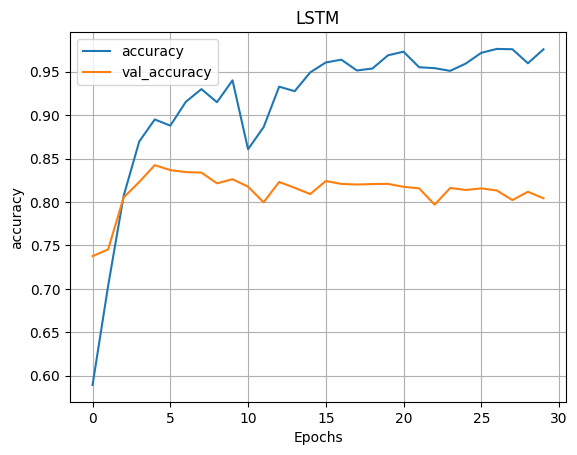

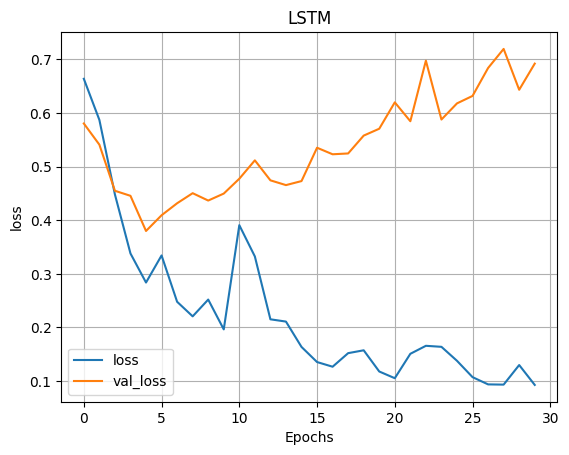

In [ ]:
# Plot the accuracy and loss history
title = 'LSTM'
plot_graphs(history_lstm, 'accuracy', title)
plot_graphs(history_lstm, 'loss', title)

**Model 3: GRU(Gated Recurrent Unit)**\
is a type of recurrent neural network and usually referred to as a simpler version of the LSTM



In [ ]:
# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,997 (664.05 KB)

 Trainable params: 169,997 (664.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded,
                            training_labels_final,
                            batch_size=BATCH_SIZE,
                            epochs=NUM_EPOCHS,
                            validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 50s 218ms/step - accuracy: 0.5764 - loss: 0.6568 - val_accuracy: 0.8315 - val_loss: 0.3831
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.8706 - loss: 0.3192 - val_accuracy: 0.8350 - val_loss: 0.3673
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - accuracy: 0.9092 - loss: 0.2415 - val_accuracy: 0.8319 - val_loss: 0.4209
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 90s 262ms/step - accuracy: 0.9265 - loss: 0.2019 - val_accuracy: 0.8361 - val_loss: 0.4154
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 71s 208ms/step - accuracy: 0.9460 - loss: 0.1549 - val_accuracy: 0.8302 - val_loss: 0.4305
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.9570 - loss: 0.1296 - val_accuracy: 0.8274 - val_loss: 0.5050
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.9713 - loss: 0.0941 - val_accuracy: 0.8214 - val_loss: 0.5690
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 227ms/step - accuracy: 0.9740 - loss: 0

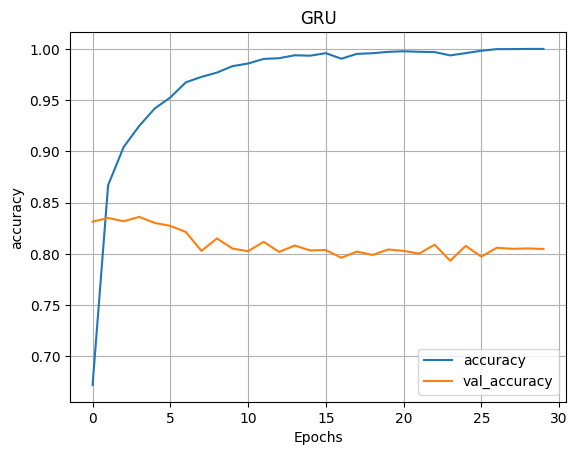

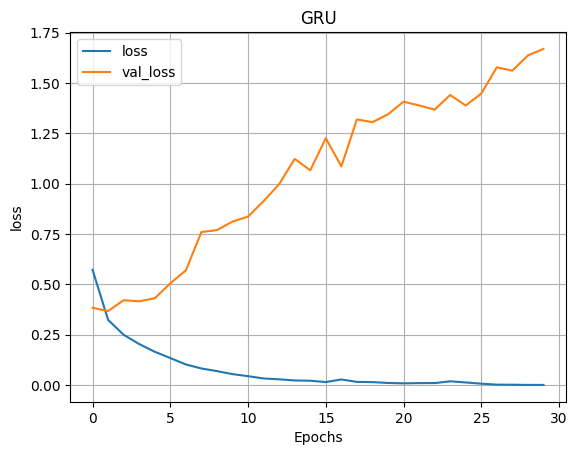

In [ ]:
# Plot the accuracy and loss history
title = 'GRU'
plot_graphs(history_gru, 'accuracy', title)
plot_graphs(history_gru, 'loss', title)

**Model 4: Convolution**

In [ ]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 116, 128)            │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             774 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,149 (668.55 KB)

 Trainable params: 171,149 (668.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded,
                              training_labels_final,
                              batch_size=BATCH_SIZE,
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels_final))


Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.6321 - loss: 0.6231 - val_accuracy: 0.8440 - val_loss: 0.3600
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8703 - loss: 0.3113 - val_accuracy: 0.8513 - val_loss: 0.3433
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9016 - loss: 0.2510 - val_accuracy: 0.8433 - val_loss: 0.3694
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9229 - loss: 0.2065 - val_accuracy: 0.8316 - val_loss: 0.4118
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9344 - loss: 0.1825 - val_accuracy: 0.8293 - val_loss: 0.4291
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9461 - loss: 0.1539 - val_accuracy: 0.8273 - val_loss: 0.4603
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9502 - loss: 0.1429 - val_accuracy: 0.8230 - val_loss: 0.5105
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9604 - loss: 0.1234 - va

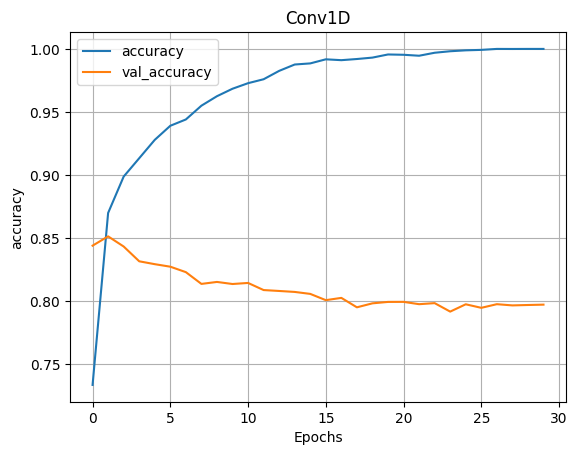

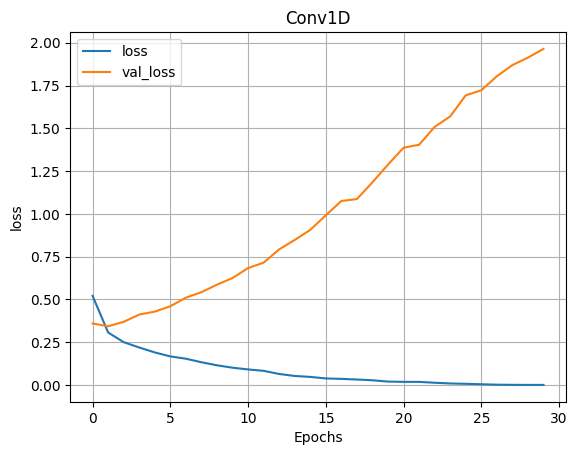

In [ ]:
# Plot the accuracy and loss history
title = 'Conv1D'
plot_graphs(history_conv, 'accuracy', title)
plot_graphs(history_conv, 'loss', title)